# CLIENT CODE
## Author: Jesús Berríos

---
Import libraries

In [9]:
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display
import os
import datetime as dt

---
## **Testing different confidence values for image detection**
In this client code, the /predict endpoint is reached by the URL "full_url". In this URL, the confidence parameter is added in the corresponding structure:

In [10]:
base_url = 'http://localhost:8000'
endpoint = '/predict'
model = 'yolov3-tiny'
conf_val = 0.2

full_url = base_url + endpoint + "?model=" + model + "&conf=" + str(conf_val)
full_url

'http://localhost:8000/predict?model=yolov3-tiny&conf=0.2'

Create folders if they do not exist:

In [11]:
dir_name = "images_predicted"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

Response from server function:

In [12]:
def response_from_server(url, image_file, verbose=False):
    """Makes a POST request to the server and returns the response

    Arguments:
        url (str): URL to be reached.
        image_file (_io.BufferedReader): Image file to be uploaded.
        verbose (bool): True or False in case logs are required.

    Returen:
        requests.models.Response: Server response.
    """
    
    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "200 OK" if status_code == 200 else f"Hubo un error al ejecutar la solicitud (Error {status_code})"
        print(msg)
    return response

Display image from response function:

This function displays the image from the server response. It has the *print_conf* parameter, in case that the client wants to pront the confidence value taken by the model. Moreover, it has a *date* distinction in order to avoid overwriting in the server.

In [13]:
def display_image_from_response(response, print_conf=False):
    """Despliega la imagen de la respuesta del servidor.

    Argumentos:
        response (requests.models.Response): La respuesta del servidor luego de la detección de objetos
    """
    date = dt.datetime.now().strftime('%m%d_%H%M%S%f')
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = f"image_with_objects_{date}.jpeg"
    cv2.imwrite(f'images_predicted/{filename}', image)
    if print_conf==True:
        print(prediction.request.url.split('&')[1])
    display(Image(f'images_predicted/{filename}'))
    

Test prediction with 0.67 confidence value:

conf=0.67


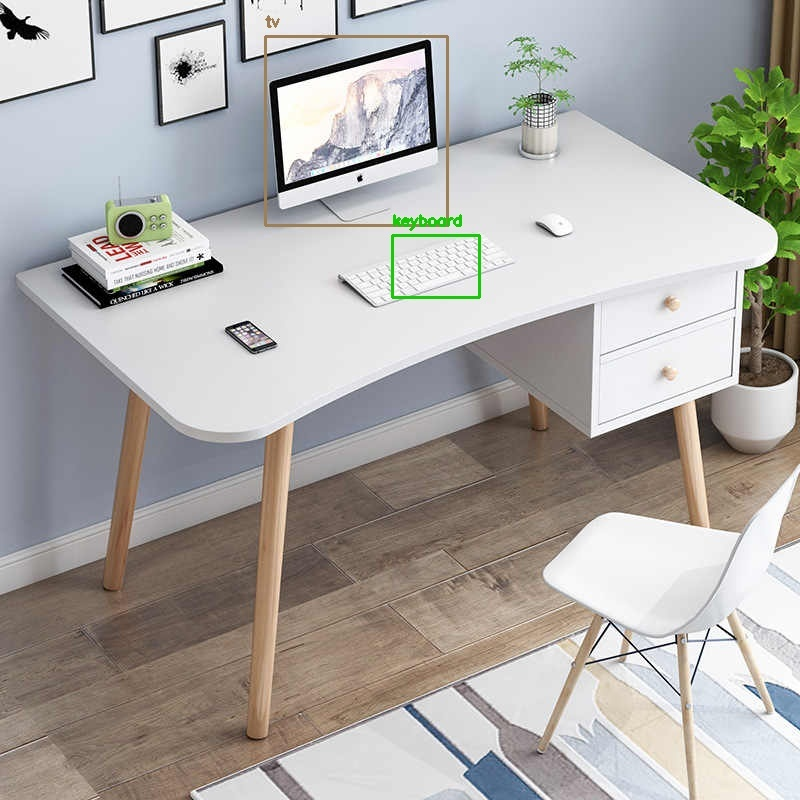

http://localhost:8000/predict?model=yolov3-tiny&conf=0.67


In [14]:
base_url = 'http://localhost:8000'
endpoint = '/predict'
model = 'yolov3-tiny'
conf_val = 0.67
full_url = base_url + endpoint + "?model=" + model + "&conf=" + str(conf_val)

with open("images/desk.jpg", "rb") as image_file:
    prediction = response_from_server(full_url, image_file)

display_image_from_response(prediction, print_conf=True)

print(prediction.request.url)

En el pie de la imagen se imprime la URL obtenida a partir de la predicción, mostrando el valor de confidence que fue utilizado para la misma.

Utilizando 0.67, se tiene que el modelo sólo detecta dos objetos a pesar de que existan más por lo que en las siguientes secciones se iterará sobre estos valores en la misma imagen.

### **2.2.1 Pruebe con la imagen fruits.jpg para distintos niveles de confianza y comente los resultados.**
Se procede con la iteración de valores de confidence distintos para la imagen *fruits.jpg* = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

conf=0.1


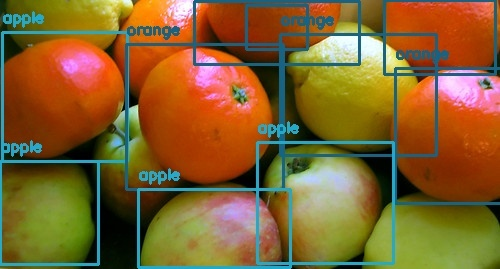

-------------------------------------------------------------
conf=0.2


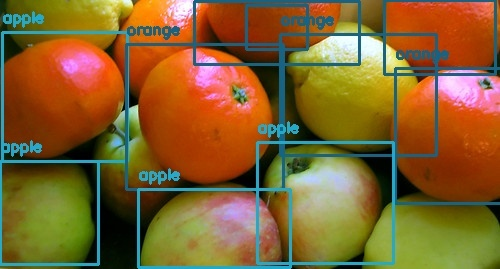

-------------------------------------------------------------
conf=0.3


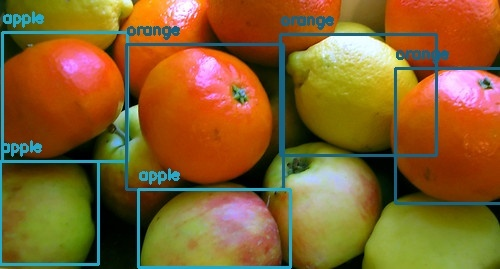

-------------------------------------------------------------
conf=0.4


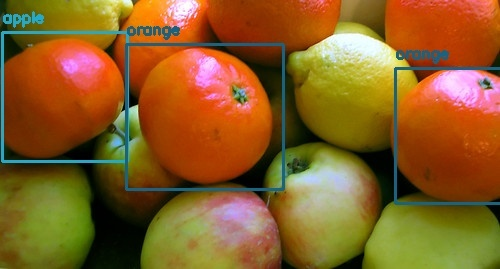

-------------------------------------------------------------
conf=0.5


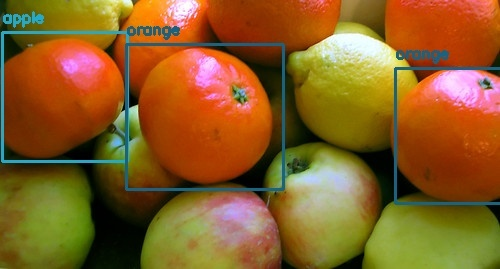

-------------------------------------------------------------
conf=0.6


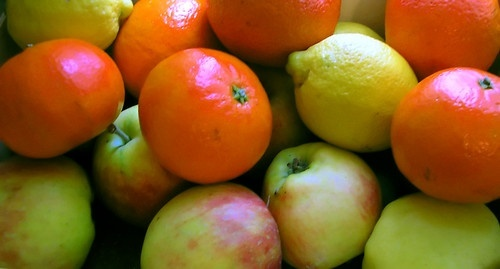

-------------------------------------------------------------
conf=0.7


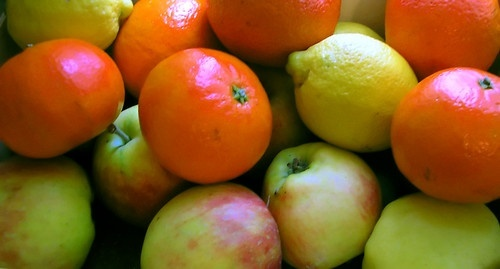

-------------------------------------------------------------
conf=0.8


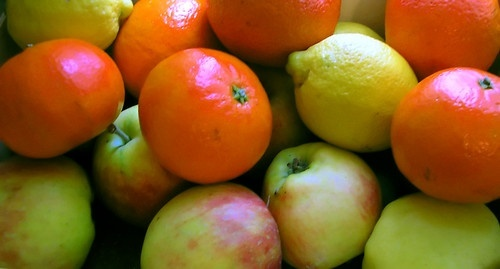

-------------------------------------------------------------
conf=0.9


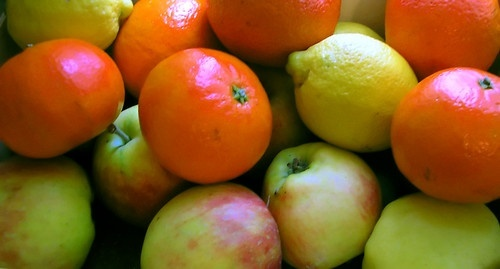

-------------------------------------------------------------


In [15]:
image_iter = 'fruits.jpg'

for i in np.array([*range(1,10)])/10:
    with open(f"images/{image_iter}", "rb") as image_file:
        full_url_loop = base_url + endpoint + "?model=" + model + "&conf=" + str(i)
        prediction = response_from_server(full_url_loop, image_file, verbose=False)
    
    display_image_from_response(prediction, print_conf=True)
    print('-------------------------------------------------------------')

**Comentarios:**
Al iterar en el nivel de confidence entre valores [0.1,0.9] con step de 0.1 para la imagen *fruits.jpg* se puede observar claramente que mientras menor es el valor de confianza, mayor es la posibilidad de detección de objetos pero esto puede implicar errores en las detecciones. Por ejemplo, para *confidence=0.1* se puede apreciar visualmente que la fruta orange que está en la parte superior central está siendo detectada dos veces, además de tener frutas que aparentemente son naranjas catalogadas como manzanas.

Mientras va incrementando el nivel de confidence, se tiene que menos frutas son detectadas ya que este parámetro actúa como umbral de decisión ante el nivel de confianza que tenga el modelo sobre la imagen detectada. De igual forma se puede apreciar en un valor más alto de *confidence=0.3*, que se detectan menos frutas pero aun así se clasifica un limón como una naranja, ya que el modelo está al menos un 30% seguro que lo detectado es naranja.

Para valores de confidence más altos (a partir de 0.6) se puede apreciar que el modelo no arroja detecciones de objetos ya que los valores de confianza individual de cada objeto de la foto son menores a dicho umbral.

### **2.2.2 ¿Se le ocurre alguna otra imagen que sea interesante evaluar en este escenario? (puede buscar cualquier imagen en Internet, no necesariamente las adjuntas en los archivos)**
Se itera sobre imagen *desk.jpg*

conf=0.1


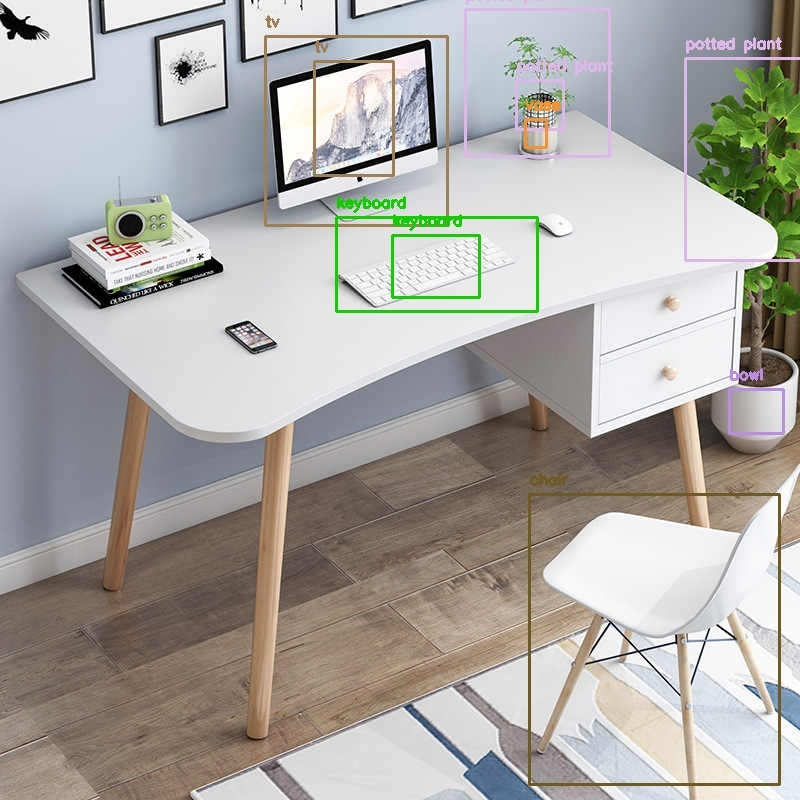

conf=0.2


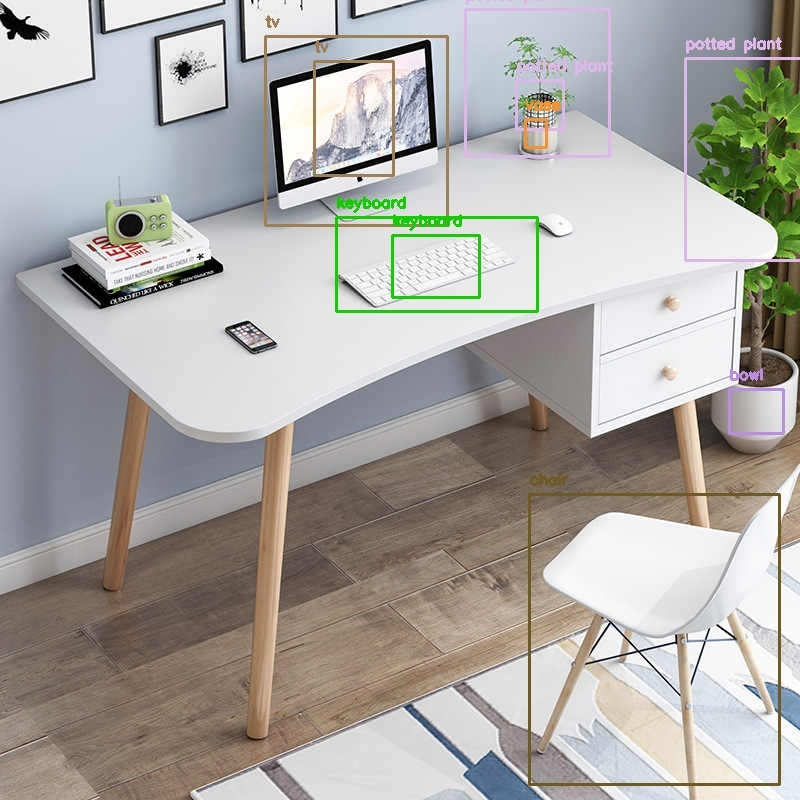

conf=0.3


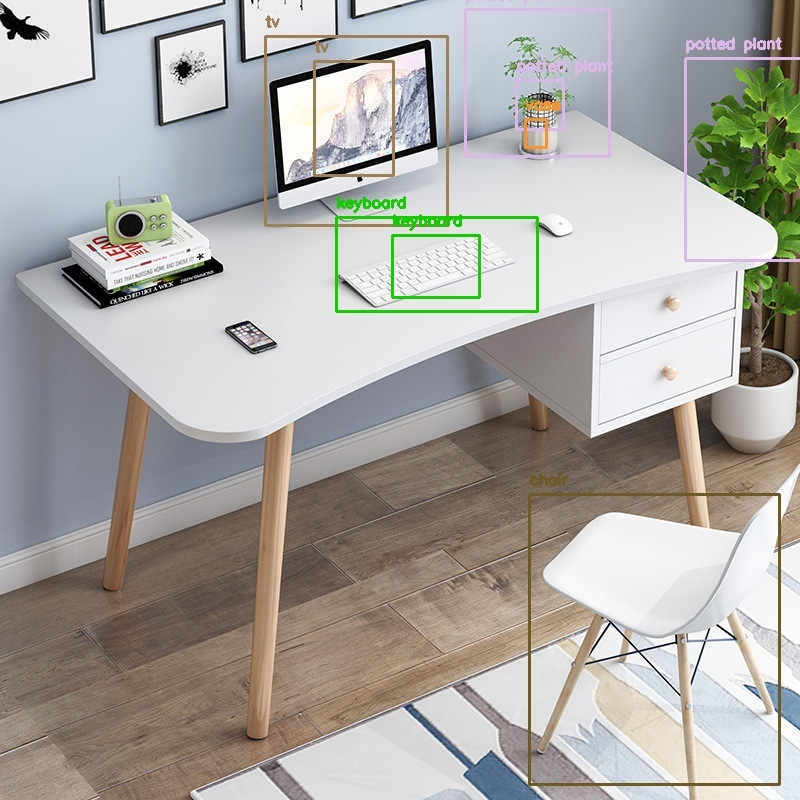

conf=0.4


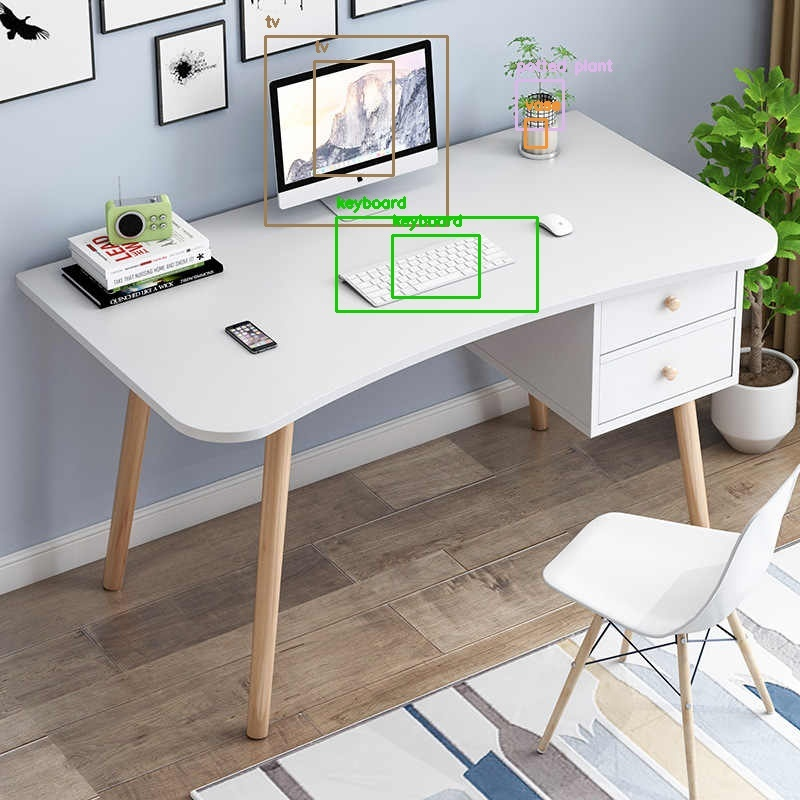

conf=0.5


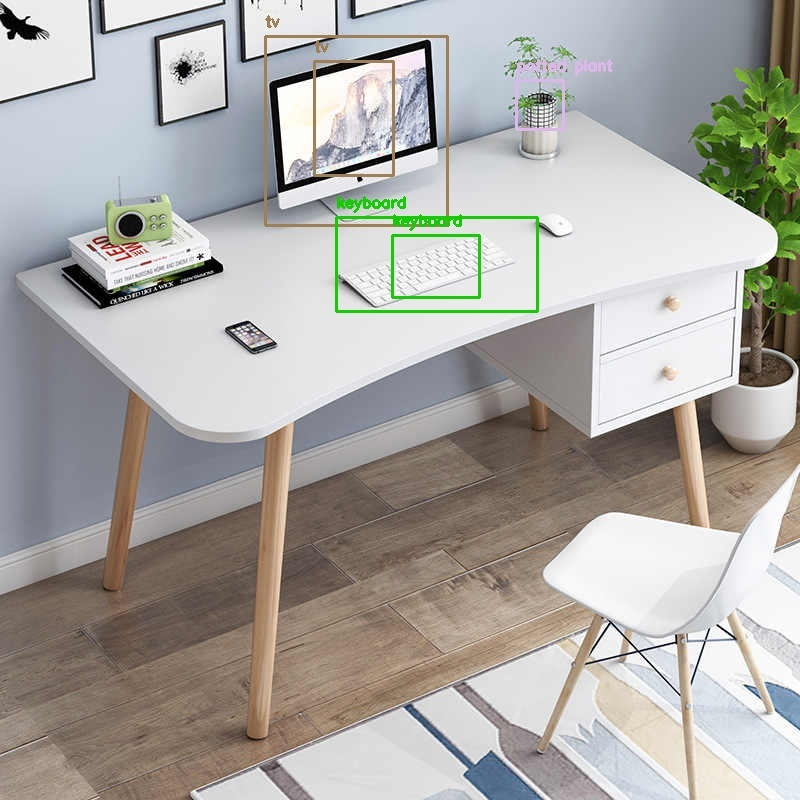

conf=0.6


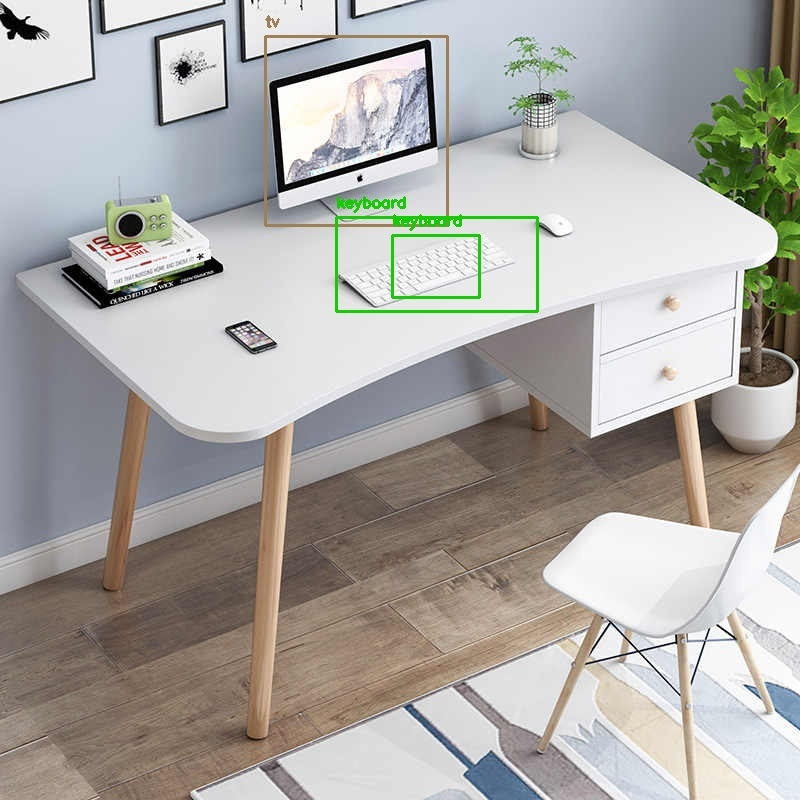

conf=0.7


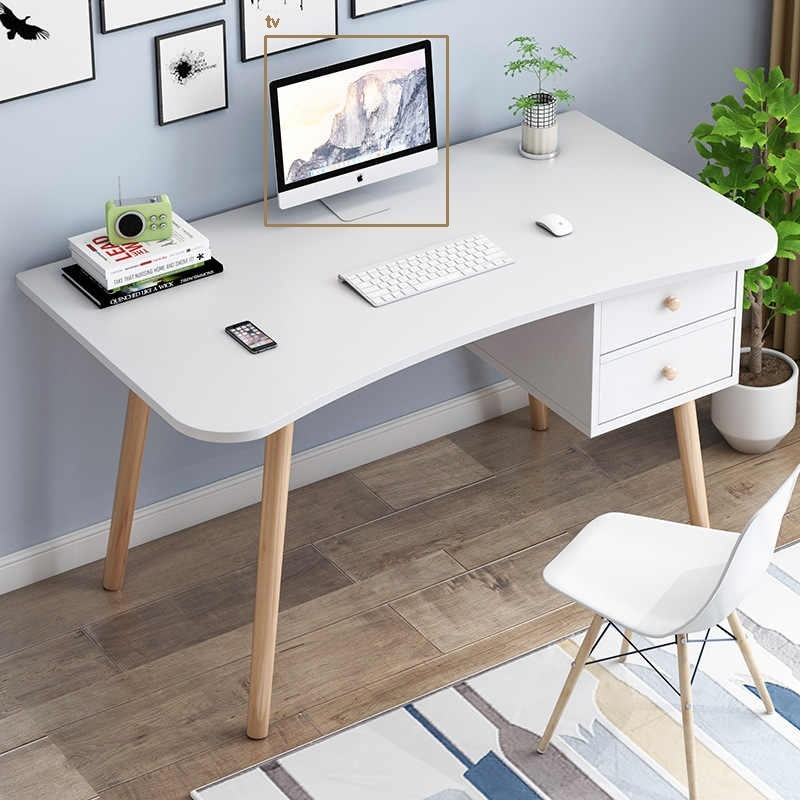

conf=0.8


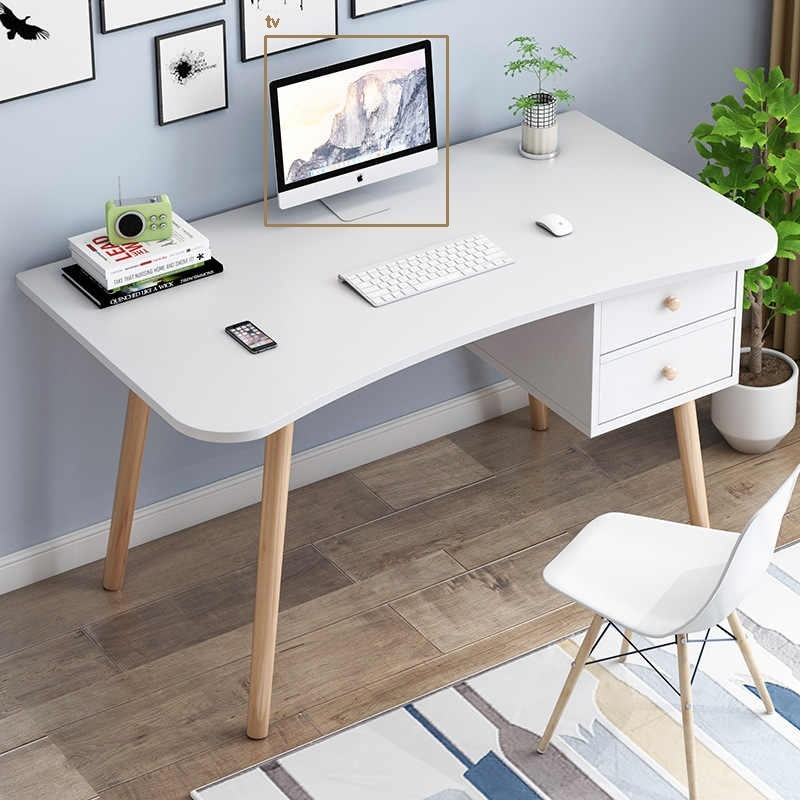

conf=0.9


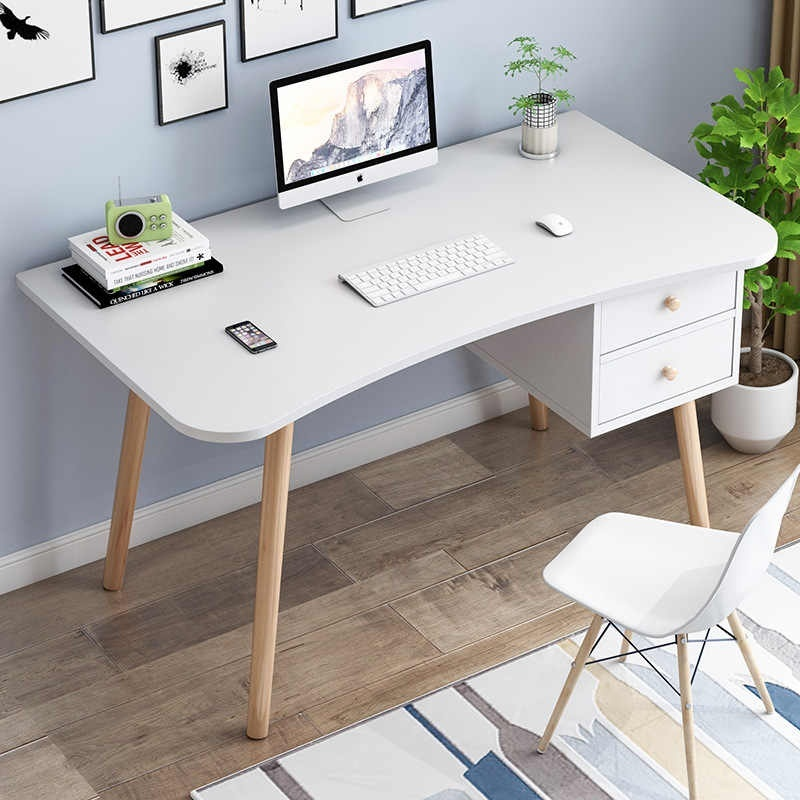

In [16]:
image_iter = 'desk.jpg'

for i in np.array([*range(1,10)])/10:
    with open(f"images/{image_iter}", "rb") as image_file:
        full_url_loop = base_url + endpoint + "?model=" + model + "&conf=" + str(i)
        prediction = response_from_server(full_url_loop, image_file, verbose=False)
    
    display_image_from_response(prediction, print_conf=True)

**Comentarios:**
Al igual que para la imagen *fruits.jpg* se tiene mayor capacidad de detección de objetos con valores pequeños de confidence y mayor precisión con valores altos de confidence. Adicionalmente también se cuenta con dobles detecciones (keyboard, tv, potted plant).

A diferencia del ejercicio con *fruits.jpg*, en la imagen *desk.jpg* se tiene mayor variedad de objetos y menos parecidos entre sí lo que ocasiona que no haya confusión entre distintos objetos como sí puede ser más probable en el caso de frutas ya que se asemejan más en forma y color. Individualmente se puede destacar que el monitor está catalogado como "tv" pero esto ocurre porque entre los objetos que detecta el modelo no se encuentra disponible "monitor" y además un monitor y una tv tienen gran parecido, de hecho como humanos podemos confundirlos si no hay un contexto que nos exprese si es un tv o monitor.

Teniendo en cuenta las pruebas realizadas, se puede destacar que el valor de confidence a utilizar dependería del contexto del problema y las prioridades del mismo. Por ejemplo, si se quiere detectar si hay al menos una silla en la foto bastaría con un valor de confidence bajo, en cambio, si se quisiera detectar cuántas plantas hay en la foto habría que ejecutar un ajuste de confidence teniendo en cuenta la precisión del modelo y la posibilidad de detecciones dobles o confusión con otros objetos.

---
## **2.4 Agregue al cliente las funcionalidades necesarias para probar el funcionamiento del endpoint /countObjects. Pruebe con imágenes que presenten: 1, 2, 3, 4, 5 o más ocurrencias del objeto en cuestión.** 

Se añade el parámetro "object" a la URL=*url_count* para que el cliente defina qué objeto quiere detectar, mientras que en el server se genera el endpoint /countObjects.

Se procede a probar el funcionamiento del endpoint /countObjects para la detección de personas para una foto con 1, 2, 3, 4, 5 y más personas (*imlist*). Se ajusta el valor de *confidence a 0.001* para tratar de forzar que el modelo detecte la mayor cantidad de personas posible, adicionalmente en el mismo procedimiento se imprimen las cajas de detección (usando el endpoint /predict) para saber qué objetos precisamente se contaron en el endpoint /countObjects y así poder complementar el análisis.

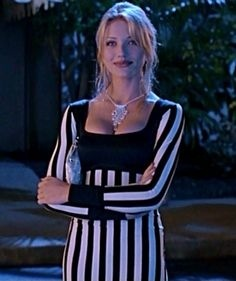

Cantidad_person=0
----------------------------------------


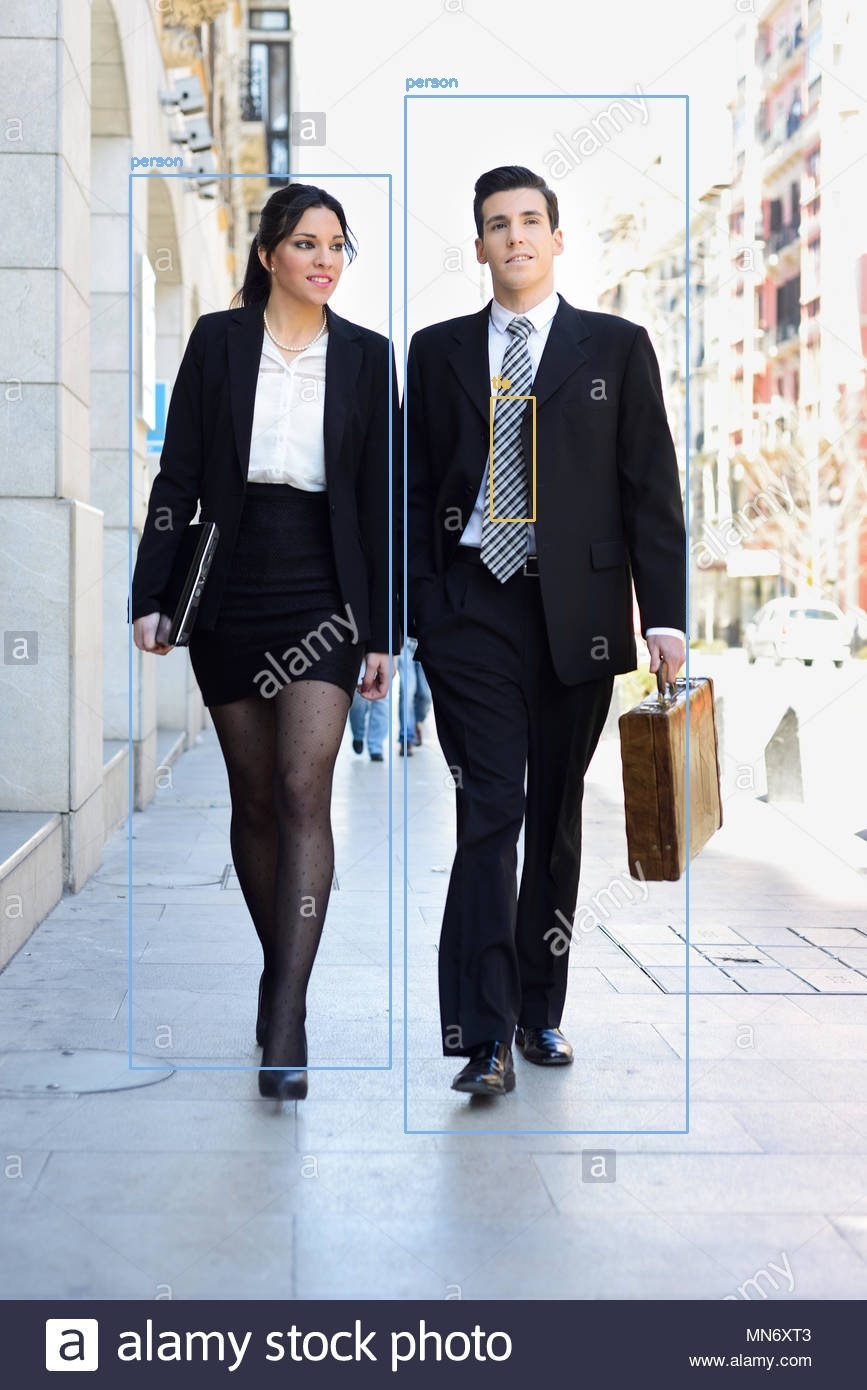

Cantidad_person=2
----------------------------------------


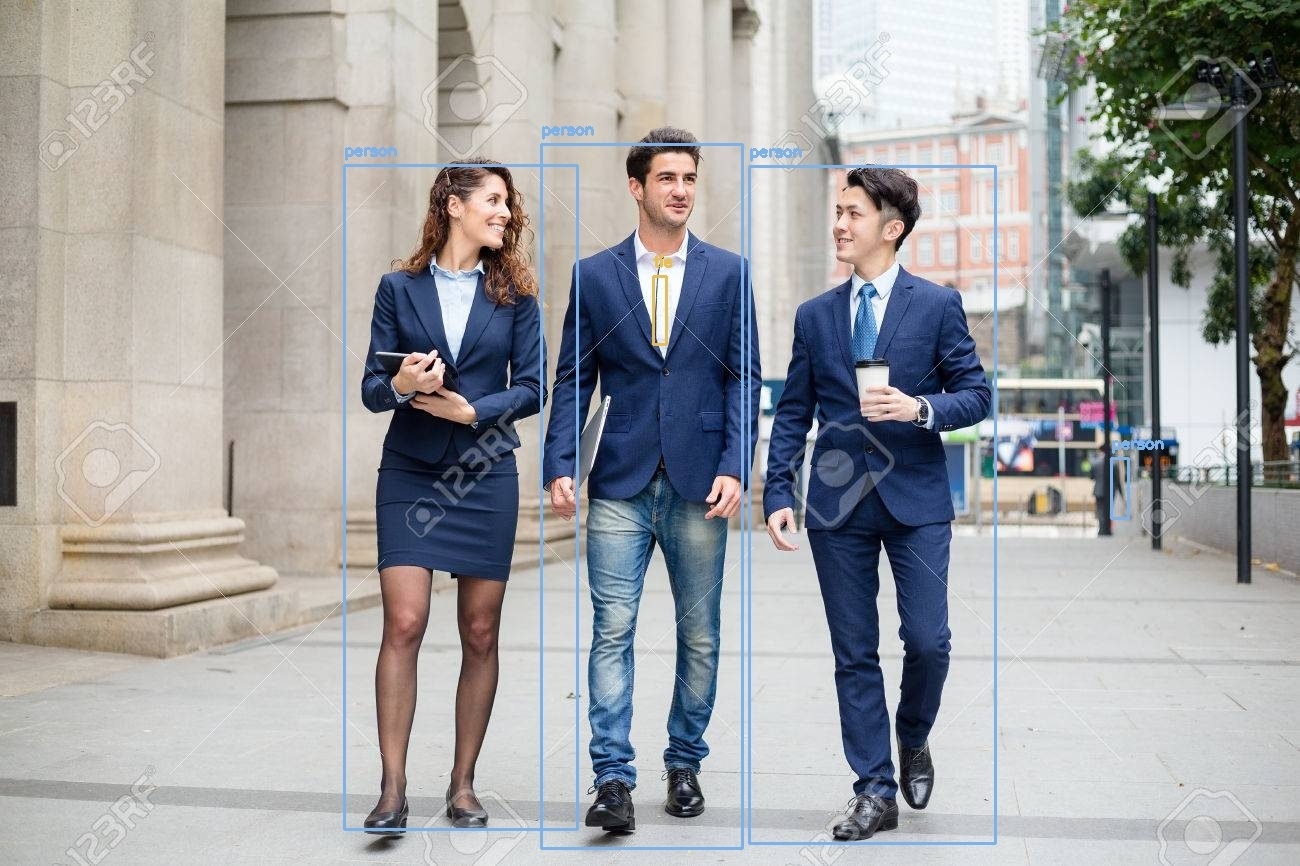

Cantidad_person=4
----------------------------------------


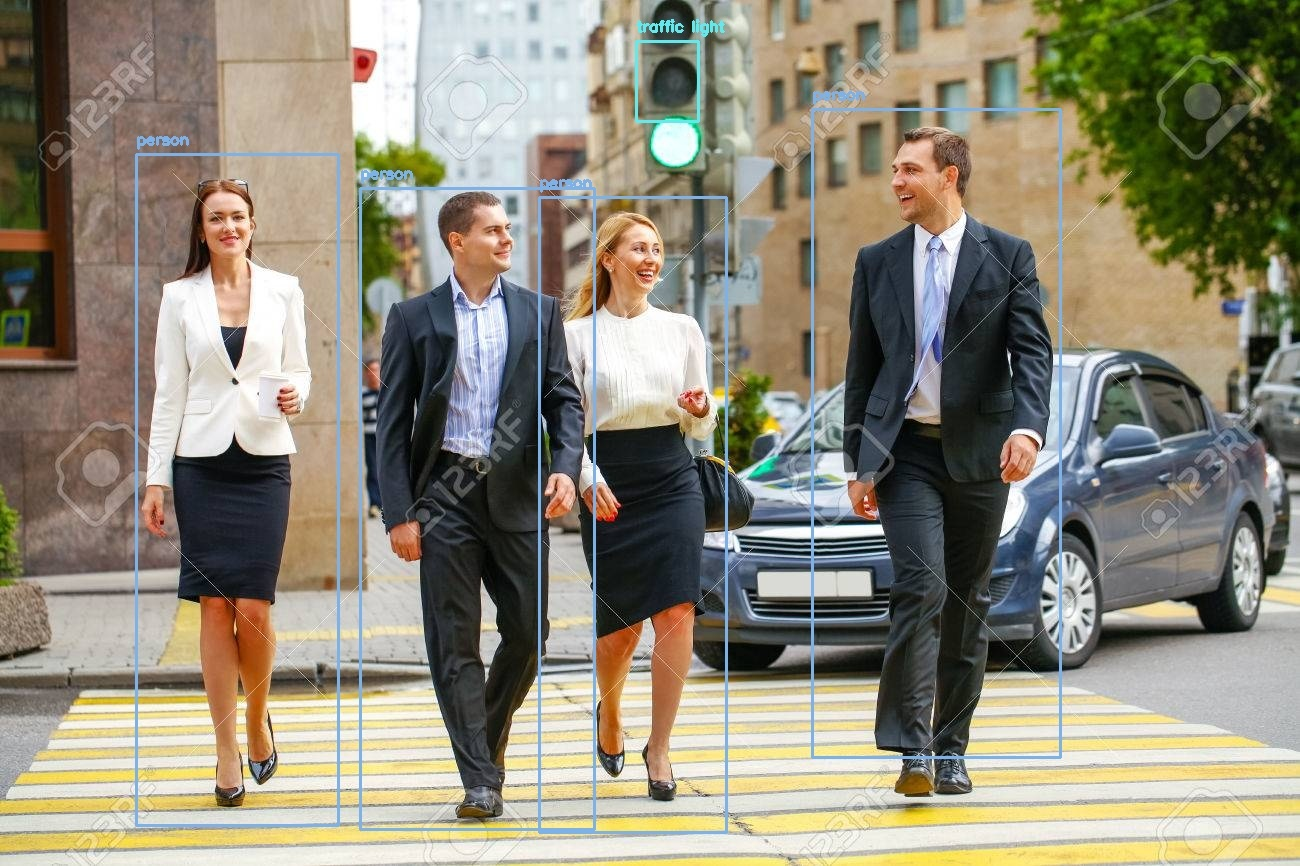

Cantidad_person=4
----------------------------------------


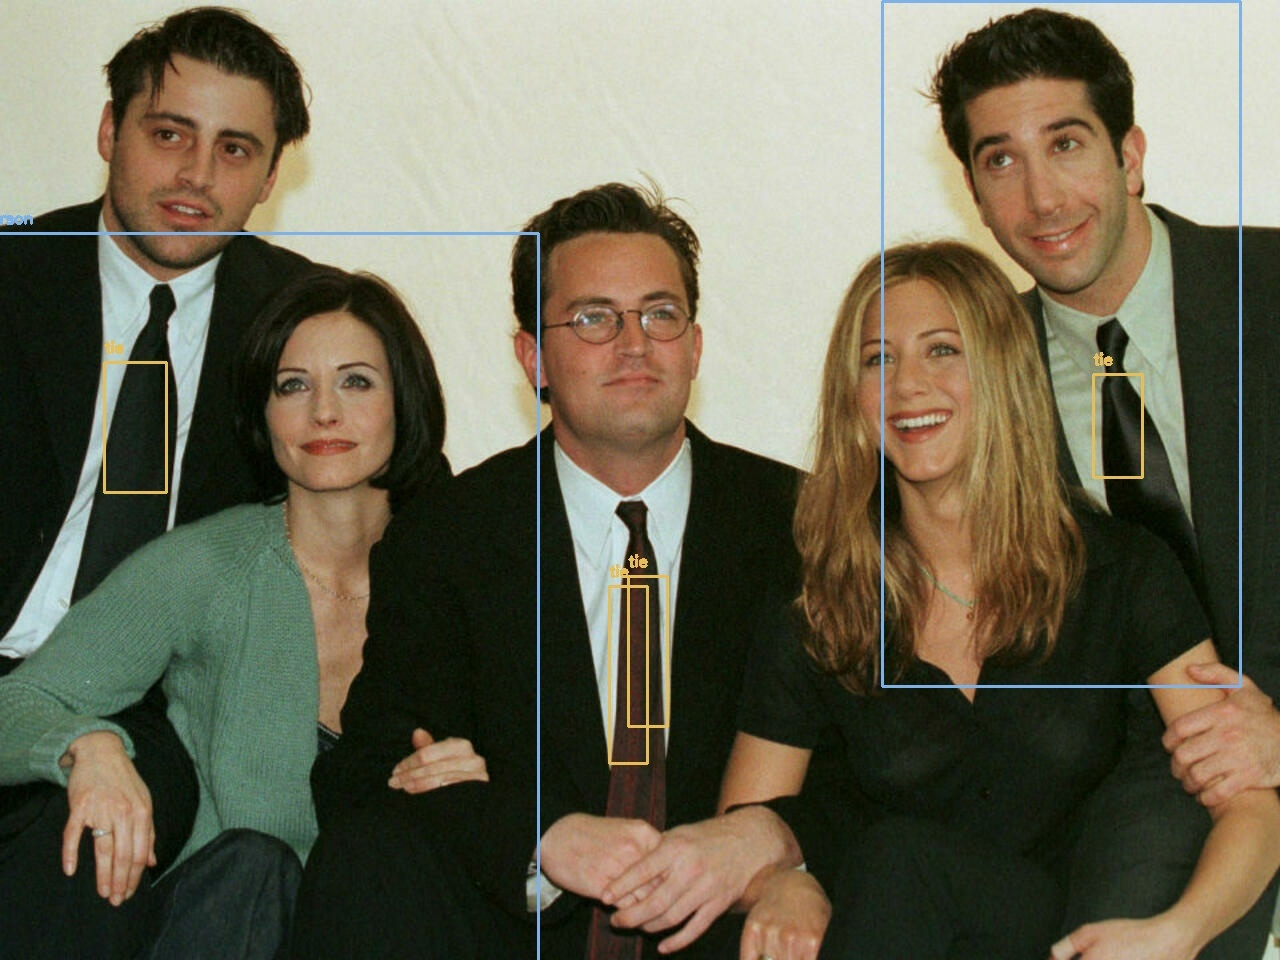

Cantidad_person=2
----------------------------------------


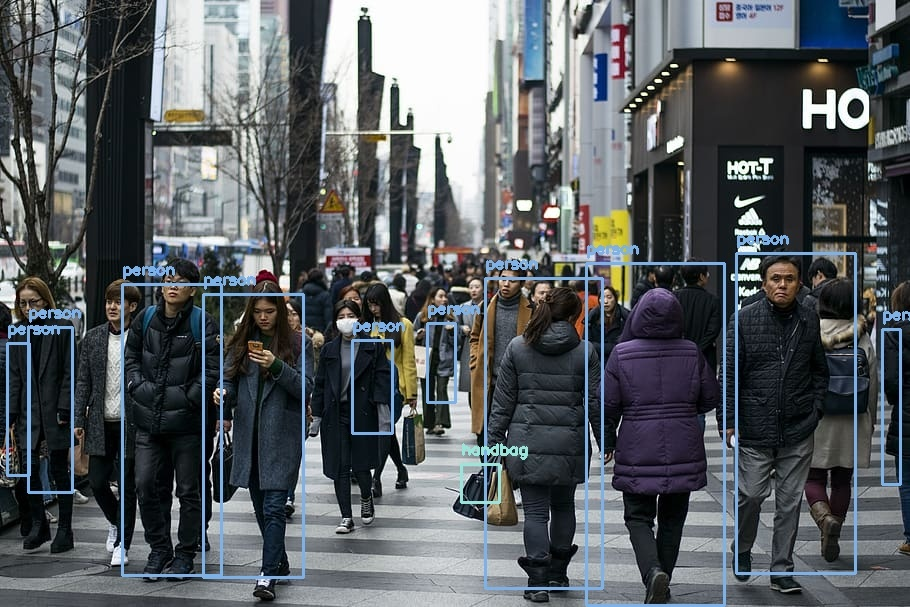

Cantidad_person=10
----------------------------------------


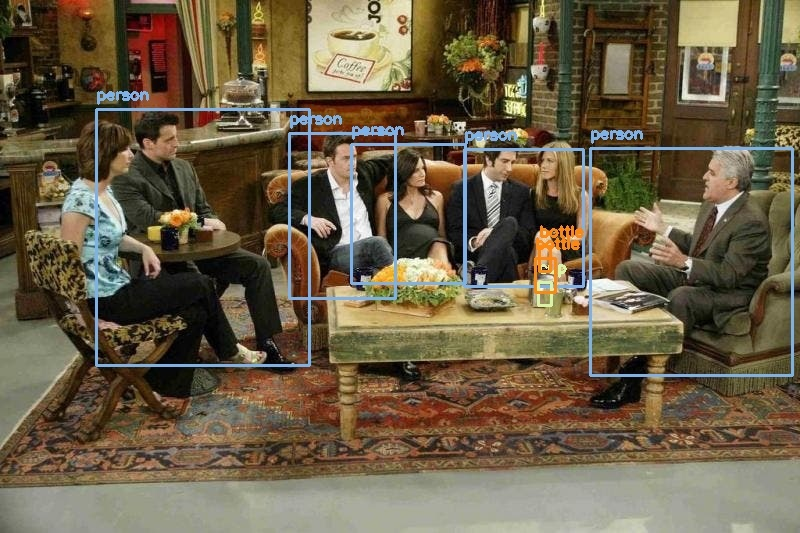

Cantidad_person=5
----------------------------------------


In [17]:
imlist = ['people_one.jpeg','people_two.jpeg','people_three.jpeg',
        'people_four.jpeg','people_five.jpeg','people_alot.jpeg','people_alot2.jpeg']
ep_count = '/countObjects'
object = 'person'
conf_val = 0.001
url_count = base_url + ep_count + "?model=" + model + "&conf=" + str(conf_val) + "&object=" + object

endpoint = '/predict'
conf_val = 0.001
url_det = base_url + endpoint + "?model=" + model + "&conf=" + str(conf_val)

for i in imlist:
    with open(f"images/{i}", "rb") as image_file:
        prediction = response_from_server(url_det, image_file)
        #display(Image(filename=f"images/{i}"))
        display_image_from_response(prediction)
        
    with open(f"images/{i}", "rb") as image_file:
        prediction = response_from_server(url_count, image_file)
        print(str(prediction.content).replace("b'",'').replace("'",''))
    print('----------------------------------------')


**Comentarios:**
* La cantidad de recuadros person (endpoint /predict) coincide con el resultado obtenido a partir del **endpoint /countObjects con parámetro *object=person***, por lo que se comprueba el correcto funcionamiento de /countObjects. 
* Inicialmente se declaró un valor de confidence bajo para detectar a la mayor cantidad de personas posibles. Aun así, en la primera foto no se detectó a la persona única, esto puede ser porque el algoritmo parece tener mejor performance con personas de cuerpo completo, ya que también en la foto de 5 personas sólo se detectaron 2 y el corte de la foto es de medio cuerpo.
* Adicionalmente resulta curioso que en la foto de 3 personas se pudo detectar una cuarta persona que está al fondo y con resolución borrosa en la foto.
* En las fotos de más de 5 personas se puede observar tanto múltiples detecciones para una misma persona como un recuadro que engloba a más de una persona.


---
## **3.1 En base a la disponibilidad de un servidor con el endpoint /countObjects, es decir, un modelo de Machine Learning que realice conteo de objetos en imágenes, plantee una aplicación cliente que pueda crearse para construir un Producto de Datos.**
* Detalle qué tipo de problema resolvería, si se puede aplicar a alguna industria en particular, que usuarios tendría y cómo podría entregar valor a dichos usuarios. 
* ¿Qué métricas de desempeño para el Producto de Datos serían adecuadas en este escenario?

**Producto:** Contador de personas en un pasillo de supermercado. El modo de funcionamiento sería enviar las imágenes captadas por una cámara de video (30 fotos por segundo) al server del modelo y contar por una granularidad de tiempo determinada (1min, 5min, 15min) la cantidad personas en el pasillo y se promedian dichas cantidades para la granularidad determinada de acuerdo a todas las fotos tomadas. De esta forma se tendría una tendencia temporal para poder analizar la cantidad promedio de personas por pasillos por granularidad de tiempo y buscar formar inteligentes de relacionar con patrones de compra de productos, productos de temporada, entre otras características.

El problema a resolver sería la distribución inteligente de los productos, marcas y tipos de productos en el supermercado de modo que las personas puedan aglomerarse menos en los pasillos y poder comprar de forma más cómoda. De esta forma el valor entregado al usuario (cliente de supermercado) luego de tomar acciones basadas en datos de acuerdo a la distribución de personas en los pasillos, sería aumentar la experiencia del cliente en el supermercado evitando el riesgo que deje de comprar algún producto porque el pasillo está muy lleno.

Para la implementación de este producto sería conveniente reentrenar el modelo de detección yolo-v3 modificando el dataset original COCO para ajustarlo a los datos del problema (Train The Model, https://pjreddie.com/darknet/yolo/), en el que se pueden agregar personas en ángulos o cortes de imagen que actualmente no son detectados en el modelo original (ver comentario de 2.4 en la presente tarea) y usar personas con características físicas similares al lugar del mundo en donde se encuentre el supermercado.

En este escenario, una buena métrica a utilizar sería el F1-score (media harmónica entre recall y precisión) la cual toma en cuenta la cantidad de detecciones positivas exitosas entre los positivos totales (recall o TPR) y los positivos correctos de todos los clasificados como positivos (precisión). La razón por la cual se escoge F1-score es porque el foco del modelo sería asegurar que lo detectado como positivo (es persona), sea realmente una persona.



---
## **3.2 En el escenario que su producto se implemente y comience a tener usuarios. En base a lo visto en clases:**
* ¿Qué dificultades puede tener en el futuro? Enumere 5 de esas dificultades y comente cuál es la importancia de cada una.

**1. Desvío de los datos y concepto:** Las personas podrían cambiar de apariencia de acuerdo a su forma de vestir, peinados, etc. Adicionalmente pueden cambiar los grupos de edades o de género que transcurren el supermercado ocasionando que las predicciones pierdan su precisión. En otro escenario hipotético o futurístico que pretende ejemplificar algún cambio social, las personas podrían dejar de caminar y transportarse sobre sillas de ruedas flotantes y esto terminaría afectando el performance del modelo en el tiempo.

**2. Latencia/Datos Real-time:** Si la velocidad del proceso end-to-end (conversión de video a foto, envío de foto, predicción, recolección de datos predichos, etc.) para lograr las predicciones es menor a la velocidad de generación de inputs se tendrá atraso en la generación de las mismas. Es un factor a tomar en cuenta si se quiere optar por resultados en tiempo real. 

**3. Capacidad de respuesta del servidor (escalabilidad de recursos):** Los recursos del servidor pueden verse afectados por la cantidad de solicitudes de predicción simultáneas ocasionando overload de CPU, memoria, entre otros recursos. Esto podría ocurrir si al iniciar la implementación se dimensionan los recursos para una determinada cantidad de pasillos (esto se traduce a cantidad de cámaras que generan videos y a su vez fotogramas que son los input del modelo) y luego se amplía el supermercado, lo que podría ampliar la cantidad de pasillos y por consiguiente la cantidad de datos a procesar y solicitudes simultáneas al server. Por lo tanto, las expansiones del negocio deben ir de la mano con los recursos tecnológicos necesarios para que sea escalable mantener el producto de datos en el tiempo.

**4. Seguridad y privacidad:** Se están capturando imágenes personales que pueden comprometer la privacidad de las personas por lo que los datos que se tienen deben ser protegidos bajo rigurosos estándares y prácticas, ya que la información obtenida puede ser blanco de prácticas maliciosas en caso de llegar a las manos equivocadas. Alguna dificultad podría ser el robo de la información mencionada lo cual acarrearía problemas legales, mala fama o calificación de parte de los usuarios y como consecuencia pérdida de clientes.

**5. Localidad:** Si la cadena de supermercados desea expandirse a otras localidades, se debe considerar reentrenar o ajustar el modelo por cada localidad que tenga diferencia en las características físicas de las personas a detectar, ya que es posible que el modelo entrenado en una localidad no arroje los resultados esperados si se usa en otra por diferencias físicas en la población.

---
# **Adicional**
Probando el endpoint /countObjects con palabras con espacio = *potted plant*

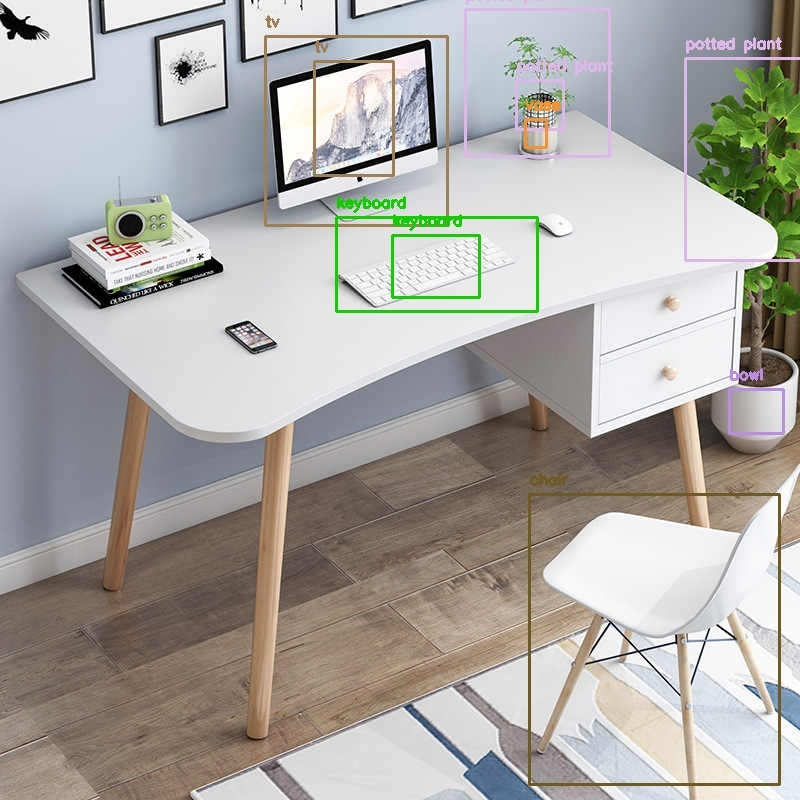

Cantidad_potted plant=3


In [18]:
ep_count = '/countObjects'
object = 'potted plant'
conf_val = 0.001
url_count = base_url + ep_count + "?model=" + model + "&conf=" + str(conf_val) + "&object=" + object

endpoint = '/predict'
conf_val = 0.001
url_det = base_url + endpoint + "?model=" + model + "&conf=" + str(conf_val)

i = 'desk.jpg'

with open(f"images/{i}", "rb") as image_file:
    prediction = response_from_server(url_det, image_file)
    #display(Image(filename=f"images/{i}"))
    display_image_from_response(prediction)
        
with open(f"images/{i}", "rb") as image_file:
    prediction = response_from_server(url_count, image_file)
    print(str(prediction.content).replace("b'",'').replace("'",''))
